### Installation notes 

##### Prerequisites 
Python v3 \
Jupyter notebook 

##### Python packages to run the code
pip install networkx \
pip install matplotlib 

In [26]:
#gfa parser to write the gfa file to dictiory and add repeats after confirmation
#the first step in the code 
from collections import defaultdict

class gfa_parser:
    '''
    Read the spades output in GFA v1.0 graph to genrate 
    nodes and edges. 
    
    #Class initiation
    x=gfa_parser("chrom2.gfa")
    
    #calling a specific function within the class
    print(x.gfa_parser("chrom2.gfa"))
    #prints all the nodes and edges from the gfa 
    
    '''
    def __init__(self, gfa):
        self.gfa=gfa
        
    
    def gfa_parser(self, gfa):
        #reading the gfa file to a new variable
        g1=open(gfa, "r")
        nodes=[]
        edges=[]
        coverage={}
        sequences={}
        for line in g1:
            if (line.startswith("L")):
                link=line.split('\t')
                edges.append([link[1],link[3]])
            
            elif (line.startswith("S")):
                info=line.split('\t')
                seq=float(info[1])
                sequences[seq]=info[2]
                cov=info[-1].split(":")[-1]
                cov=float(cov.strip("\n"))
                if (cov>2.0):
                    coverage[info[1]]=cov
        
        #user input
        repeats=[]
        for f in repeats:
            cv=int(coverage.get(f))
            cv=(cv-1)/2
            temp=f
            for index in range (int(cv)):
                rename=str(f)+"r"+str(index)
                edges.append([temp,rename])
                temp=rename
                
        return(edges, coverage, sequences)

### Notes

***Vibrio splendidus* genome Chromosome 1 contains 7 rRNA genes and 97 tRNA genes, while chromosome 2 contains 1 rRNA gene and 17 tRNA genes**

Below includes order of the rrn operon in chromosome1 and chromosome2. Confirmed  these sequences using BLAST as well, there are several nanopore reads with these sequences - Example 6de21c81-fa59-4e88-9fe0-b1d585bfa675 has 10 of the below sequences and 99cce163-3455-46f7-8887-5483343d16b7.

|Node |coverage |length | num of hits before|num of hits after| Annotation |
|---|-----|-----|---------|-----|-----|
|25| 3.91| 85bp | 6 |11| 5S ribosomal sequence| 
|26| 11.96| 81bp  |6 |11| 5S ribosomal sequence |
|32| 13.16 | 57bp | 5| 9| no associated gene/protein |
|9 | 8.45 | 2941bp | 4| 9| 23S ribosomal sequence|
|29| 2.91| 61bp| 5 | 9| 16S-23S ribosomal RNA intergenic spacer|
|30 | 8.18| 57bp |5| 9| 16S-23S ribosomal RNA intergenic spacer|
|18| 11.85| 168bp |4 | 9| 23S ribosomal sequence|
|16| 4.89| 276bp | 6 | 13| 16S-23S ribosomal RNA intergenic spacer|
|11 | 14.56 |1604bp | 4 | 9| 16S ribosomal sequence|
|31| 11.07| 57bp | 5 | 10|no associated gene/protein |
|21| 9.50| 152bp |6| 11| no associated gene/protein|
|24| 5.85| 140bp | 6 | 11| no associated gene/protein| 
|27| 5.04| 75bp | 5 | 10| no associated gene/protein|

Conclusion - If the hits contained 1 23S and 1 16S sequence, that was counted as an rrn operon. In total chromosom1 has 8 operons and chromsome2 has 1 operon.

|Node |coverage |length | num of hits before|num of hits after| Annotation |Likely repeat sequence |
|---|-----|-----|---------|-----|-----|----|
|22| 2.39| 144bp |5 | 10| tRNA sequence|multiple places|
|17| 3.09| 205bp |4 | 7| tRNA sequence|multiple places|

Conclusion - The tRNA sequences align at multiple places - left this as is.

|Node |coverage |length | num of hits before|num of hits after| Annotation |Likely repeat sequence | nanopore reads |
|---|-----|-----|---------|-----|-----|----|---|
|28| 6.73| 70bp| 1 | 1| 16S-23S ribosomal RNA intergenic spacer| repeat|6e5d2ec6-8da1-4d65-b4b3-7ca64210c18d, 8325866e-2b95-405e-9a53-f1b35696d56d, 930ddd43-974e-4c91-978b-5b0eaccc41ad (100% pid and 70bp in length)|
|12 (self loop)| 41.66| 336bp | 2| 43| hypothetical protein |repeat|aa3f95b9-4aa9-4639-8e56-5a53cd42e95d, da702a33-0ac2-4993-a19d-539d7206489d, bc276ee2-23d6-45ef-a9fb-aca9fdb72e2c (top three reads, but each of these reads show that the 12 seqeunces is repeated on the same nanopore read)|
|23| 10.54| 142bp |1 | 1| no associated gene/protein |repeat|aae08399-414f-4b89-943c-d997cd1e51ec (best hit), multiple reads but doesnt show evidence of repeats like 12|
|33| 7.59| 42bp | 2 | 2| no associated gene/protein|repeat|aae08399-414f-4b89-943c-d997cd1e51ec,06008824-bf67-4a6e-ad3b-6c146a5a629c, 8325866e-2b95-405e-9a53-f1b35696d56d, ed3cf1af-9eb3-463c-8360-735a5de87e8a, 1cef8308-f6d3-4efb-b787-247161ca4418, 97c0acbd-e6d8-4884-9a70-8ac6481fb784 (100%pid and 42bp in length)|

Conclusion - Since node 12 is definitely a repeat, added this repeat to the seqeuence. 

|Node |coverage |length | num of hits before|num of hits after| Annotation |
|---|-----|-----|---------|-----|-----|
|36| 8.12| 27bp | 0 | 0| -|
|37| 3.16| 21bp | 0 | 0| - |
|38| 2.84 | 15bp | 0 | 0| - |
|39| 4.58| 7bp | 0 | 0| -|
|41 | 5.86| 6bp| 0| 0| -| 

Conclusion - ignored the above sequences 

**This genome has 8 rrn operons in chrom1 and 1rrn operon in chrom2.**


In [2]:
# Python3 program to find the maximum depth of tree from a given node
# counts the depth of the tree from the left tree and right tree
# Python3 program to find the maximum depth of tree 
import networkx as nx
# A binary tree node 
def maxDepth (node, dfs, graph): 
    if node is None: 
        return (0)
    else : 
        # Compute the depth of each subtree 
        n=list(G.nodes())[0]
        value=list(dfs[node])
        left_tree=0
        right_tree=0
        left=value[0]
        right=value[1]
        while (left is not None):
            try:
                left=dfs[left][0]
                left_tree=left_tree+1
            except KeyError:
                break
        while (right is not None):
            try:
                right=dfs[right][0]
                right_tree=right_tree+1
            except KeyError:
                break
        
    return (left_tree+1, right_tree+1)

In [3]:
#if the node has two branches
# 1) check the depth of the right and the left branch
# 2) traverse through the branch that is the shortest then traverse back to the node that had two branches back to the next branch
# 3) also checks to make sure the first node remains to have only 1 neighbor
def adding_nodes_with_two_branches(key, successors, old_graph, new_graph):
    d=maxDepth(key, successors, old_graph)
    left_depth=d[0]
    right_depth=d[1]
    
    #if the maximum depth to the left tree and right tree are both 1
    if (right_depth==1) and (left_depth==1):
        new_graph=check_before_adding(key, val[0], new_graph)
        #getting the last node
        last_node=get_last_edge(new_graph)[1]
        #tracking back
        new_graph=check_before_adding(last_node, key, new_graph)
        new_graph=check_before_adding(key, val[1], new_graph)
                    
    #if the left depth is less than the right depth
    elif (left_depth<right_depth):    
        #print ("left depth is less than right depth", left_depth, right_depth)
        if (left_depth==1):
            new_graph=check_before_adding(key, val[0], new_graph)
            #getting the last node
            last_node=get_last_edge(new_graph)[1]
            #tracing back
            new_graph=check_before_adding(last_node, key, new_graph)
            new_graph=check_before_adding(key, val[1], new_graph)
        else:
            new_graph=check_before_adding(key, val[0], new_graph)
            successors[key]=(val[1])

    #if the right depth is less than the left depth
    elif (left_depth>right_depth):
        #print ("left depth is more than right depth", left_depth, right_depth)
        if (right_depth==1):
            new_graph=check_before_adding(key, val[1], new_graph)
            #getting the last node
            last_node=get_last_edge(new_graph)[1]
            #tracing back
            new_graph=check_before_adding(last_node, key, new_graph)
            new_graph=check_before_adding(key, val[0], new_graph)
        else:
            new_graph=check_before_adding(key,val[1], new_graph)
            successors[key]=(val[0])
            
    return (successors, new_graph)

In [4]:
# getting the last edge and nodes added to the new tree
def get_last_edge(new_graph):
    edges=list(new_graph.edges())
    last_edge=edges[-1]
    last_node=last_edge[1].split('_')[0]
    prev_node=last_edge[0].split('_')[0]
    return (last_edge, last_node, prev_node)

In [5]:
# this function only renames the node since it already exists in the 
#   new graph 
# assumes that the node was already checked to confirm that 
#   the node is already added to the new graph 
def rename_node(node, new_graph):
    nodes=new_graph.nodes()
    count=1
    new_node=node+"_"+str(count)
    if (new_node in nodes):
        ngbr=len(list(new_graph.neighbors(new_node)))
        if (ngbr==1):
            new_node=new_node
        elif (ngbr==2):
            count=count+1
            new_node=node+"_"+str(count)
    
    return (new_node)

In [6]:
#before adding a  new edge, check if the nodes in the edge are 
#  1) first that the node exists or not in the new_graph 
#  2) check if the node neighbors are 2 or 1
#  3) node1 and node2 is not the first node in the graph
def check_before_adding(node1, node2, new_graph):
    
    #getting the first node in the new graph
    n=list(G.nodes())[0]
        
    if (node1 not in new_graph.nodes()) and (node2 not in new_graph.nodes()):
        new_graph.add_edge(node1, node2)

    elif (node1 in new_graph.nodes()) and (node2 not in new_graph.nodes()):
        n1_ngbrs=len(list(new_graph.neighbors(node1)))
        if (n1_ngbrs==1) and (node1 !=n):
            new_graph.add_edge(node1, node2)
        elif (n1_ngbrs==1) and (node1 ==n):
            x=rename_node(node1, new_graph)
            new_graph.add_edge(x, node2)
        elif (n1_ngbrs==2):
            x=rename_node(node1, new_graph)
            new_graph.add_edge(x, node2)

    elif(node1 not in new_graph.nodes()) and (node2 in new_graph.nodes()):
        n2_ngbrs=len(list(new_graph.neighbors(node2)))
        if (n2_ngbrs==1) and (node2 !=n):
            new_graph.add_edge(node1, node2)
        elif (n2_ngbrs==1) and (node2 ==n):
            x=rename_node(node2, new_graph)
            new_graph.add_edge(node1, x)
        elif (n2_ngbrs==2):
            x=rename_node(node2, new_graph)
            new_graph.add_edge(node1, x)

    elif (node1 in new_graph.nodes()) and (node2 in new_graph.nodes()):
        n1_ngbrs=len(list(new_graph.neighbors(node1)))
        n2_ngbrs=len(list(new_graph.neighbors(node2)))
        if (n1_ngbrs==1) and (n2_ngbrs==1):
            if (node1 ==n) and (node2 !=n):
                x=rename_node(node1, new_graph)
                new_graph.add_edge(x,node2)
            elif (node1 !=n) and (node2 ==n):
                x=rename_node(node2, new_graph)
                new_graph.add_edge(node1, x)
            else:
                new_graph.add_edge(node1, node2)

        elif (n1_ngbrs==2) and (n2_ngbrs==1):
            if (node2 !=n):
                x=rename_node(node1, new_graph)
                new_graph.add_edge(x, node2)
            else:
                k=rename_node(node1, new_graph)
                v=rename_node(node2, new_graph)
                new_graph.add_edge(k,v)
    
        elif (n1_ngbrs==1) and (n2_ngbrs==2):
            if (node1 !=n):
                x=rename_node(node2, new_graph)
                new_graph.add_edge(node1,x)
            else:
                k=rename_node(node1, new_graph)
                v=rename_node(node2, new_graph)
                new_graph.add_edge(k,v)
        else:
            k=rename_node(node1, new_graph)
            v=rename_node(node2, new_graph)
            new_graph.add_edge(k,v)
    return(new_graph)

In [7]:
# finding the paths from the last node to the first node and selecting the 
# shortest path
# using the dictionary to retrieve the neighbors
def path_to_first_node(last_node, first_node, old_graph):
    #getting the neighbors of the last node and working on adding the nodes to the graph accordingly
    last_node=last_node.split("_")[0]
    last_node=last_node.split("r")[0]
    nbrs=list(old_graph.neighbors(last_node))
    left_path=list(nx.shortest_path(old_graph, source=nbrs[0], target=first_node))
    right_path=list(nx.shortest_path(old_graph, source=nbrs[1], target=first_node))

    return (left_path, right_path)

In [8]:
#traversing through the two shortest paths from the last node to the key 
def shortest_path_to_first_node(left_path, right_path, new_graph):
                                
    #getting the last_node added to the new_graph 
    last_node=list(new_graph.nodes())[-1]
    
    #traversing the shortest path back
    if (len(left_path)==len(right_path)):
        for f in range(len(left_path)):
            if (f==0):
                new_graph=check_before_adding(last_node, left_path[f], new_graph)
            else:
                new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
                
    elif (len(left_path)<len(right_path)):
        for f in range(len(left_path)):
            if (f==0):
                new_graph=check_before_adding(last_node, left_path[f], new_graph)
            else:
                new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
                
    elif (len(left_path)>len(right_path)):
        for f in range(len(right_path)):
            if (f==0):
                new_graph=check_before_adding(last_node, right_path[f], new_graph)
            else:
                new_graph=check_before_adding(right_path[f-1], right_path[f], new_graph)
    
    return (new_graph)

In [9]:
# Writing out the complete graph as a fasta file. 
# the new complete graph is written out to "new_graph" variable, 
# but this holds only inforamtion about the node names and the sequence itself.
import re
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def graph_to_fasta(graph, name, sequences):
    #made sure the nodes were added in the correct order
    nodes=graph.nodes()
    final_seq=""
    length=len(nodes)-1
    count=0
    for f in nodes:
        if (count<length):
            raw_node=f.split("_")[0]
            raw_node=raw_node.split("r")[0]
            #print (raw_node)
            seq=sequences[int(raw_node)]
            final_seq = final_seq+seq
            count=count+1
    final_seq=Seq(final_seq)
    
    #writing out the final seq as a record class
    final = SeqRecord(final_seq, id=name, description="putting it together")
    return (final)
    
###############################################
# Driver program
##############################################
#final=graph_to_fasta(new_graph, sequences)
#print (final.seq)

{'2': ['12'], '12': ['3'], '3': ['17'], '17': ['8', '19'], '8': ['26'], '26': ['23'], '23': ['21'], '21': ['31'], '31': ['11'], '11': ['27'], '27': ['24'], '24': ['6'], '6': ['25'], '25': ['22', '32'], '22': ['5'], '5': ['37'], '37': ['4'], '32': ['33'], '33': ['39'], '39': ['9'], '9': ['40', '29'], '40': ['34'], '34': ['38'], '38': ['35'], '29': ['18'], '18': ['28', '30'], '28': ['36'], '36': ['20'], '20': ['41'], '41': ['16']}
key, val, count 2 ['12'] 0
successors= {'12': ['3'], '3': ['17'], '17': ['8', '19'], '8': ['26'], '26': ['23'], '23': ['21'], '21': ['31'], '31': ['11'], '11': ['27'], '27': ['24'], '24': ['6'], '6': ['25'], '25': ['22', '32'], '22': ['5'], '5': ['37'], '37': ['4'], '32': ['33'], '33': ['39'], '39': ['9'], '9': ['40', '29'], '40': ['34'], '34': ['38'], '38': ['35'], '29': ['18'], '18': ['28', '30'], '28': ['36'], '36': ['20'], '20': ['41'], '41': ['16']}
key, val, count 12 ['3'] 1
successors= {'3': ['17'], '17': ['8', '19'], '8': ['26'], '26': ['23'], '23': ['2

1

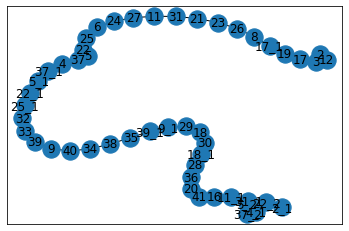

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

#calling the gfa parser first to retrieve the data from gfa
#user input
input_name="chrom1.gfa"
x=gfa_parser(input_name)
edges=x.gfa_parser(input_name)[0]
coverage=x.gfa_parser(input_name)[1]
sequences=x.gfa_parser(input_name)[2]

#using networkx package to write the edges from gfa to graph
G=nx.Graph()
G.add_edges_from(edges)
#getting the first node in the graph
n=list(G.nodes())[0]
#dfs traversal
successors=nx.dfs_successors(G,n)
length=len(successors)
print (successors)

#traversing the old graph to write to a new graph, traverse through each node at least once
new_graph=nx.Graph()
count=0

while (count < length):
    keys=list(successors.keys())
    key=keys[0]
    val=successors[key]
    print ("key, val, count",key, val, count)
    #print ("successors=", successors)
    
    #adding the first edge if there is only branch down the tree
    if (count==0) and(len(val)==1):
        new_graph.add_edge(key, val[0]) 
        count=count+1 
        successors.pop(key)
    
    #if the first node has two branches and picking the edge with the shortest depth
    elif (count==0) and (len(val)!=1):
        two_branches=adding_nodes_with_two_branches(key, successors, G, new_graph)
        successors=two_branches[0]
        count=count+1 
        successors.pop(key)
        
    #adding the rest of the nodes 
    elif (count!=0):
        #getting the last node
        last_node=get_last_edge(new_graph)[1]
        
        #making sure the last node is the same as the next key
        if (last_node==key):
            
            #if there is only one branch
            if (len(val)==1):
                new_graph=check_before_adding(key, val[0], new_graph)
                count=count+1 
                successors.pop(key)
                
            #if there are two branches
            else:
                #print ("adding edges with more than one path")
                two_branches=adding_nodes_with_two_branches(key, successors, G, new_graph)
                successors=two_branches[0]
                new_graph=two_branches[1]
                count=count+1 
                successors.pop(key)
   
        
        #if the last_node is not the same as the key, not in continuation 
        else:
            
            #finding the continuation node in the dict, if it exists 
            if (last_node in list(successors.keys())):
                val=successors[last_node]
                
                #if there is only one branch from key
                if (len(val)==1):
                    new_graph=check_before_adding(last_node, val[0], new_graph)
                    count=count+1 
                    successors.pop(key)
                
                #if there is more than one branch down the tree
                else:
                    two_branches=adding_nodes_with_two_branches(key, successors, G, new_graph)
                    successors=two_branches[0]
                    new_graph=two_branches[1]
                    count=count+1 
                    successors.pop(key)
                    
            #finding the continuation node in the dict, if it doesn't exists 
            else:
                #finding the shortest path to the key from the last node
                path=path_to_first_node(last_node, key, G)
                left_path=path[0]
                right_path=path[1]
                new_graph=shortest_path_to_first_node(left_path, right_path, new_graph)               

    #print ("count, length of keys, keys", count, len(keys), keys)
    #print (new_graph.edges())
    print ("successors=", successors)
    
#adding last node
last_node=get_last_edge(new_graph)[1]
last_node=last_node.split('r')[0]
path=path_to_first_node(last_node, n, G)
left_path=path[0]
right_path=path[1]
new_graph=shortest_path_to_first_node(left_path, right_path, new_graph)               
print (new_graph.edges())

#print (new_graph.edges)
nx.draw_networkx(new_graph)

# writing the graph to fasta file 
final=graph_to_fasta(new_graph, input_name, sequences)
SeqIO.write(final, "ED252-chrom1-final-norepeats.fasta", "fasta")

#### Notes 

The last shell may have to be changed to functions as well.. Not sure how yet in a Jupyter notebook. If changed to a code, then add argparse python package. 

Replace the first line - name="chrom1.gfa" and last line "ED252-chrom1-final.fasta". Replace the names for different files

This generated two files, one for chromosome 1 and another for chromosome 2. In bash ran the command, 
    
`cat ED252-chrom1-final.fasta ED252-chrom2-final.fasta >ED252-final.fasta`
    
   